In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# !pip install cufflinks
# !pip install yfinance
# !pip install pandas_datareader
# !pip install scipy.signal
# !pip install collections
from collections import defaultdict
from scipy.signal import argrelextrema
import cufflinks as cf
from pandas_datareader import data
import requests
import sys
import yfinance as yf

In [2]:
start = "2010-01-01"
end = "2020-12-31"

In [3]:
symbol = ["MSFT", "IVV"]

In [4]:
df = yf.download(tickers=symbol, start=start, end=end)
df.head()

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
                  IVV       MSFT         IVV       MSFT         IVV   
Date                                                                  
2009-12-31  87.721176  23.389154  111.809998  30.480000  113.139999   
2010-01-04  89.164742  23.749819  113.650002  30.950001  113.739998   
2010-01-05  89.423698  23.757484  113.980003  30.959999  114.029999   
2010-01-06  89.494270  23.611692  114.070000  30.770000  114.339996   
2010-01-07  89.886543  23.366140  114.570000  30.450001  114.669998   

                              Low                   Open              Volume  \
                 MSFT         IVV       MSFT         IVV       MSFT      IVV   
Date                                                                           
2009-12-31  30.990000  111.610001  30.480000  113.099998  30.980000  3000900   
2010-01-04  31.100000  112.709999  30.590000  112.769997  30.620001  3574200   
2010-01-05  31.100000  113.250000  30.639999  113.620003  30.850000  2784100   
2010-01-06  31.080000  113.790001  30.520000  113.889999  30.879999  3912800   
2010-01-07  30.700001  113.550003  30.190001  113.870003  30.629999  2977600   

                      
                MSFT  
Date                  
2009-12-31  31929700  
2010-01-04  38409100  
2010-01-05  49749600  
2010-01-06  58182400  
2010-01-07  50559700

In [5]:
df.to_csv("stocks.csv")

In [6]:
df = pd.read_csv("stocks.csv", header = [0, 1], index_col = 0, parse_dates = [0])
df.head()

Adj Close                  Close                   High  \
                  IVV       MSFT         IVV       MSFT         IVV   
Date                                                                  
2009-12-31  87.721176  23.389154  111.809998  30.480000  113.139999   
2010-01-04  89.164742  23.749819  113.650002  30.950001  113.739998   
2010-01-05  89.423698  23.757484  113.980003  30.959999  114.029999   
2010-01-06  89.494270  23.611692  114.070000  30.770000  114.339996   
2010-01-07  89.886543  23.366140  114.570000  30.450001  114.669998   

                              Low                   Open              Volume  \
                 MSFT         IVV       MSFT         IVV       MSFT      IVV   
Date                                                                           
2009-12-31  30.990000  111.610001  30.480000  113.099998  30.980000  3000900   
2010-01-04  31.100000  112.709999  30.590000  112.769997  30.620001  3574200   
2010-01-05  31.100000  113.250000  30.639999  113.620003  30.850000  2784100   
2010-01-06  31.080000  113.790001  30.520000  113.889999  30.879999  3912800   
2010-01-07  30.700001  113.550003  30.190001  113.870003  30.629999  2977600   

                      
                MSFT  
Date                  
2009-12-31  31929700  
2010-01-04  38409100  
2010-01-05  49749600  
2010-01-06  58182400  
2010-01-07  50559700

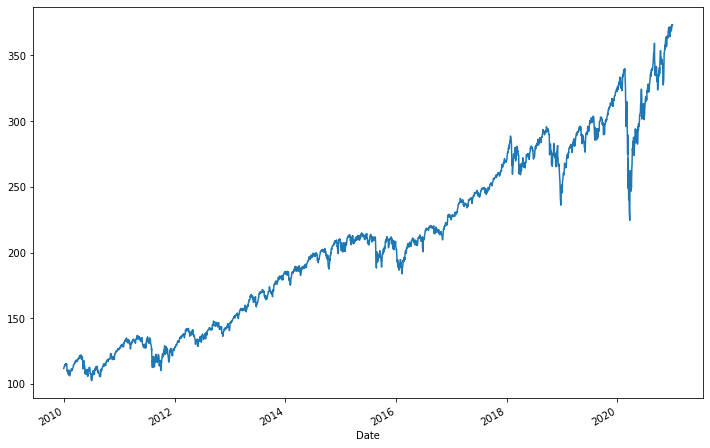

In [7]:
df.Close.IVV.plot(figsize = (12, 8))
plt.show()

<AxesSubplot:xlabel='Date'>

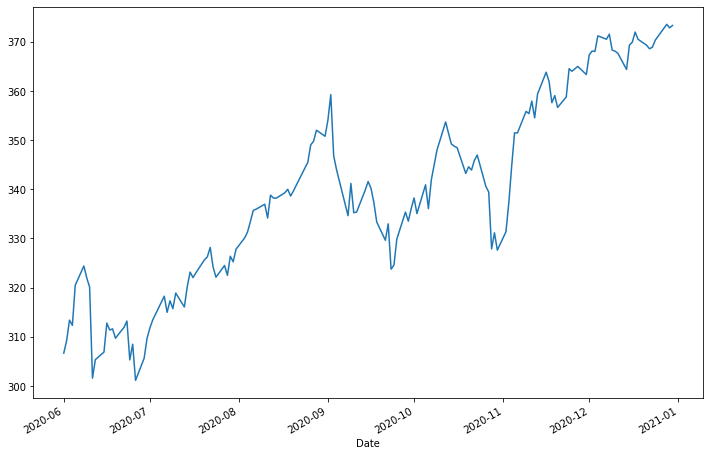

In [8]:
df.loc["2020-06":, ("Close", "IVV")].plot(figsize = (12, 8))

# INTERACTIVE PLOTS

In [9]:
cf.set_config_file(offline = True)

In [10]:
df.loc["2020-06":, ("Close", "IVV")].iplot()

In [11]:
df.Close.iplot()

# Customize charts

In [12]:
df.Close.iplot(fill = True)

In [13]:
cf.colors.scales()

In [14]:
df.Close.iplot(fill = True, colorscale = "reds")

In [15]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [16]:
df.Close.iplot(fill = True, colorscale = "reds", theme = "solar")

In [17]:
df.Close.iplot(fill = True, colorscale = "reds", title = "Stocks title", xTitle = "time", yTitle = "Closing price")

In [18]:
df.Close.iplot(kind = "spread", fill = True, colorscale = "reds", title = "Stocks title", xTitle = "time", yTitle = "Closing price")

C:\Users\Admin\anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



# Candlestick charts 

In [19]:
df.swaplevel(axis = 1)

IVV        MSFT         IVV        MSFT         IVV  \
             Adj Close   Adj Close       Close       Close        High   
Date                                                                     
2009-12-31   87.721176   23.389154  111.809998   30.480000  113.139999   
2010-01-04   89.164742   23.749819  113.650002   30.950001  113.739998   
2010-01-05   89.423698   23.757484  113.980003   30.959999  114.029999   
2010-01-06   89.494270   23.611692  114.070000   30.770000  114.339996   
2010-01-07   89.886543   23.366140  114.570000   30.450001  114.669998   
...                ...         ...         ...         ...         ...   
2020-12-23  359.841187  217.759995  368.880005  221.020004  370.959991   
2020-12-24  361.236145  219.464493  370.309998  222.750000  370.359985   
2020-12-28  364.377228  221.641876  373.529999  224.960007  373.940002   
2020-12-29  363.674866  220.843842  372.809998  224.149994  375.399994   
2020-12-30  364.152893  218.410263  373.299988  221.679993  374.429993   

                  MSFT         IVV        MSFT         IVV        MSFT  \
                  High         Low         Low        Open        Open   
Date                                                                     
2009-12-31   30.990000  111.610001   30.480000  113.099998   30.980000   
2010-01-04   31.100000  112.709999   30.590000  112.769997   30.620001   
2010-01-05   31.100000  113.250000   30.639999  113.620003   30.850000   
2010-01-06   31.080000  113.790001   30.520000  113.889999   30.879999   
2010-01-07   30.700001  113.550003   30.190001  113.870003   30.629999   
...                ...         ...         ...         ...         ...   
2020-12-23  223.559998  368.700012  220.800003  369.630005  223.110001   
2020-12-24  223.610001  368.809998  221.199997  369.420013  221.419998   
2020-12-28  226.029999  372.440002  223.020004  373.149994  224.449997   
2020-12-29  227.179993  372.200012  223.580002  375.149994  226.309998   
2020-12-30  225.630005  372.950012  221.470001  373.739990  225.229996   

                IVV      MSFT  
             Volume    Volume  
Date                           
2009-12-31  3000900  31929700  
2010-01-04  3574200  38409100  
2010-01-05  2784100  49749600  
2010-01-06  3912800  58182400  
2010-01-07  2977600  50559700  
...             ...       ...  
2020-12-23  3234300  18699600  
2020-12-24  2040700  10550600  
2020-12-28  2342800  17933500  
2020-12-29  5401600  17403200  
2020-12-30  2727500  20272300  

[2769 rows x 12 columns]

In [20]:
ivv = df.swaplevel(axis = 1).IVV.copy()

In [21]:
ivv

Adj Close       Close        High         Low        Open  \
Date                                                                     
2009-12-31   87.721176  111.809998  113.139999  111.610001  113.099998   
2010-01-04   89.164742  113.650002  113.739998  112.709999  112.769997   
2010-01-05   89.423698  113.980003  114.029999  113.250000  113.620003   
2010-01-06   89.494270  114.070000  114.339996  113.790001  113.889999   
2010-01-07   89.886543  114.570000  114.669998  113.550003  113.870003   
...                ...         ...         ...         ...         ...   
2020-12-23  359.841187  368.880005  370.959991  368.700012  369.630005   
2020-12-24  361.236145  370.309998  370.359985  368.809998  369.420013   
2020-12-28  364.377228  373.529999  373.940002  372.440002  373.149994   
2020-12-29  363.674866  372.809998  375.399994  372.200012  375.149994   
2020-12-30  364.152893  373.299988  374.429993  372.950012  373.739990   

             Volume  
Date                 
2009-12-31  3000900  
2010-01-04  3574200  
2010-01-05  2784100  
2010-01-06  3912800  
2010-01-07  2977600  
...             ...  
2020-12-23  3234300  
2020-12-24  2040700  
2020-12-28  2342800  
2020-12-29  5401600  
2020-12-30  2727500  

[2769 rows x 6 columns]

In [22]:
ivv.loc["5-2017"].iplot(kind = "candle")

# Weekly transform

In [23]:
from pandas.tseries.frequencies import to_offset

In [24]:
weekly = ivv.resample("W-Fri").ohlc()

In [25]:
weekly

Adj Close                                           Close  \
                  open        high         low       close        open   
Date                                                                     
2010-01-01   87.721176   87.721176   87.721176   87.721176  111.809998   
2010-01-08   89.164742   90.192520   89.164742   90.192520  113.650002   
2010-01-15   90.318047   90.459282   89.439331   89.439331  115.120003   
2010-01-22   90.545555   90.545555   85.995125   85.995125  115.410004   
2010-01-29   86.426689   86.458031   84.465256   84.465256  110.160004   
...                ...         ...         ...         ...         ...   
2020-12-04  352.865265  360.508789  352.865265  360.508789  363.320007   
2020-12-11  359.838593  360.839020  357.041504  357.041504  370.500000   
2020-12-18  355.422180  362.845673  355.422180  361.411743  364.350006   
2020-12-25  360.221588  361.236145  359.529022  361.236145  369.269989   
2021-01-01  364.377228  364.377228  363.674866  364.152893  373.529999   

                                                      High              ...  \
                  high         low       close        open        high  ...   
Date                                                                    ...   
2010-01-01  111.809998  111.809998  111.809998  113.139999  113.139999  ...   
2010-01-08  114.959999  113.650002  114.959999  113.739998  114.970001  ...   
2010-01-15  115.300003  114.000000  114.000000  115.489998  115.489998  ...   
2010-01-22  115.410004  109.610001  109.610001  115.489998  115.489998  ...   
2010-01-29  110.199997  107.660004  107.660004  110.760002  110.809998  ...   
...                ...         ...         ...         ...         ...  ...   
2020-12-04  371.190002  363.320007  371.190002  364.390015  371.200012  ...   
2020-12-11  371.529999  367.619995  367.619995  370.989990  372.420013  ...   
2020-12-18  371.959991  364.350006  370.489990  369.570007  372.480011  ...   
2020-12-25  370.309998  368.559998  370.309998  370.140015  370.959991  ...   
2021-01-01  373.529999  372.809998  373.299988  373.940002  375.399994  ...   

                   Low                    Open                          \
                   low       close        open        high         low   
Date                                                                     
2010-01-01  111.610001  111.610001  113.099998  113.099998  113.099998   
2010-01-08  112.709999  114.010002  112.769997  114.230003  112.769997   
2010-01-15  113.559998  113.559998  115.400002  115.400002  114.320000   
2010-01-22  109.459999  109.459999  114.000000  114.629997  111.580002   
2010-01-29  107.559998  107.559998  110.570000  110.570000  109.379997   
...                ...         ...         ...         ...         ...   
2020-12-04  360.500000  368.619995  364.179993  368.679993  364.179993   
2020-12-11  364.619995  364.619995  370.429993  372.279999  366.269989   
2020-12-18  364.209991  368.359985  368.440002  372.359985  367.140015   
2020-12-25  363.380005  368.809998  366.299988  369.630005  366.299988   
2021-01-01  372.200012  372.950012  373.149994  375.149994  373.149994   

                         Volume                             
                 close     open     high      low    close  
Date                                                        
2010-01-01  113.099998  3000900  3000900  3000900  3000900  
2010-01-08  114.230003  3574200  3912800  2784100  2887600  
2010-01-15  114.989998  3100500  5227700  2608000  5227700  
2010-01-22  111.580002  3430200  9015900  3430200  7485100  
2010-01-29  109.379997  3414600  5678400  3414600  5678400  
...                ...      ...      ...      ...      ...  
2020-12-04  368.679993  4093400  4121900  3068500  4091800  
2020-12-11  366.269989  3162300  4501600  3151100  4501600  
2020-12-18  372.359985  3797600  8472400  3797600  6697600  
2020-12-25  369.420013  5221600  5221600  2040700  2040700  
2021-01-01  373.739990  2342800  540160

# Aggregating

In [26]:
weekly = ivv.resample("W-Fri").agg({
    "Open": "first",
    "High": "max",
    "Low": "min",
    "Close": "last"
})

In [27]:
weekly

Open        High         Low       Close
Date                                                      
2010-01-01  113.099998  113.139999  111.610001  111.809998
2010-01-08  112.769997  114.970001  112.709999  114.959999
2010-01-15  115.400002  115.489998  113.559998  114.000000
2010-01-22  114.000000  115.489998  109.459999  109.610001
2010-01-29  110.570000  110.809998  107.559998  107.660004
...                ...         ...         ...         ...
2020-12-04  364.179993  371.200012  360.500000  371.190002
2020-12-11  370.429993  372.420013  364.619995  367.619995
2020-12-18  368.440002  372.480011  364.209991  370.489990
2020-12-25  366.299988  370.959991  363.380005  370.309998
2021-01-01  373.149994  375.399994  372.200012  373.299988

[575 rows x 4 columns]

In [28]:
weekly.index = weekly.index - to_offset("4d")

In [29]:
weekly

Open        High         Low       Close
Date                                                      
2009-12-28  113.099998  113.139999  111.610001  111.809998
2010-01-04  112.769997  114.970001  112.709999  114.959999
2010-01-11  115.400002  115.489998  113.559998  114.000000
2010-01-18  114.000000  115.489998  109.459999  109.610001
2010-01-25  110.570000  110.809998  107.559998  107.660004
...                ...         ...         ...         ...
2020-11-30  364.179993  371.200012  360.500000  371.190002
2020-12-07  370.429993  372.420013  364.619995  367.619995
2020-12-14  368.440002  372.480011  364.209991  370.489990
2020-12-21  366.299988  370.959991  363.380005  370.309998
2020-12-28  373.149994  375.399994  372.200012  373.299988

[575 rows x 4 columns]

In [30]:
weekly.loc["5-2017":"9-2017"].iplot(kind = "candle")

# Volume

In [31]:
q_ivv = cf.QuantFig(df = ivv.loc["5-2017"])

In [32]:
type(q_ivv)

cufflinks.quant_figure.QuantFig

In [33]:
q_ivv.iplot(title = "Volume IVV")

In [34]:
q_ivv.add_volume(colorchange = False)

# Technical indicators

In [35]:
ivv

Adj Close       Close        High         Low        Open  \
Date                                                                     
2009-12-31   87.721176  111.809998  113.139999  111.610001  113.099998   
2010-01-04   89.164742  113.650002  113.739998  112.709999  112.769997   
2010-01-05   89.423698  113.980003  114.029999  113.250000  113.620003   
2010-01-06   89.494270  114.070000  114.339996  113.790001  113.889999   
2010-01-07   89.886543  114.570000  114.669998  113.550003  113.870003   
...                ...         ...         ...         ...         ...   
2020-12-23  359.841187  368.880005  370.959991  368.700012  369.630005   
2020-12-24  361.236145  370.309998  370.359985  368.809998  369.420013   
2020-12-28  364.377228  373.529999  373.940002  372.440002  373.149994   
2020-12-29  363.674866  372.809998  375.399994  372.200012  375.149994   
2020-12-30  364.152893  373.299988  374.429993  372.950012  373.739990   

             Volume  
Date                 
2009-12-31  3000900  
2010-01-04  3574200  
2010-01-05  2784100  
2010-01-06  3912800  
2010-01-07  2977600  
...             ...  
2020-12-23  3234300  
2020-12-24  2040700  
2020-12-28  2342800  
2020-12-29  5401600  
2020-12-30  2727500  

[2769 rows x 6 columns]

In [36]:
q_ivv = cf.QuantFig(df = ivv.loc["2017": "2018"])

In [37]:
q_ivv.add_sma(periods = 20)
q_ivv.add_sma(periods = 100)

In [38]:
q_ivv.iplot(title = "IVV with Simple Moving Average")

In [39]:
q_ivv.add_bollinger_bands(periods = 20, boll_std = 2)

In [40]:
q_ivv.iplot(title = "IVV with Simple Moving Average")

In [41]:
q_ivv = cf.QuantFig(df = ivv.loc["5-2017": "9-2017"])

In [42]:
q_ivv.iplot(title = "IVV")

In [43]:
q_ivv.add_macd()
q_ivv.add_dmi()

# Trend Lines

In [44]:
q_ivv = cf.QuantFig(df = ivv.loc["2012"])

## Upper trend

In [45]:
q_ivv.iplot(title = "IVV 2012")

In [46]:
q_ivv.add_trendline(date0 = "2012-06-4", date1 = "2012-09-4")

## Donwtrend

In [47]:
q_ivv = cf.QuantFig(df = ivv.loc["2012"])

In [48]:
q_ivv.iplot(title = "IVV 2012")

In [49]:
q_ivv.add_trendline(date0 = "2012-05-1", date1 = "2012-05-21")

# Support and resistance lines

In [50]:
q_ivv = cf.QuantFig(df = ivv.loc["2010"])

In [51]:
q_ivv.iplot(title = "IVV 2010")

In [52]:
q_ivv.add_resistance(date = "2010-04-15")

In [53]:
q_ivv.add_support(date = "2010-06-9")

# Creating and Backtesting SMA strategies

## getting the data

In [54]:
symbol = "EURUSD=X"

In [55]:
df = yf.download(tickers=symbol, period = "10y")
df

[*********************100%***********************]  1 of 1 completed


Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2012-11-05  1.282545  1.284300  1.276992  1.282791   1.282791       0
2012-11-06  1.280246  1.281900  1.276800  1.280246   1.280246       0
2012-11-07  1.280902  1.287619  1.273869  1.280803   1.280803       0
2012-11-08  1.275559  1.277599  1.272401  1.275998   1.275998       0
2012-11-09  1.274372  1.278936  1.269340  1.274535   1.274535       0
...              ...       ...       ...       ...        ...     ...
2022-10-28  0.996780  0.999900  0.993147  0.996780   0.996780       0
2022-10-31  0.995500  0.996810  0.987352  0.995500   0.995500       0
2022-11-01  0.988631  0.995163  0.986213  0.988631   0.988631       0
2022-11-02  0.987791  0.991355  0.986758  0.987791   0.987791       0
2022-11-03  0.981836  0.984252  0.973994  0.973994   0.973994       0

[2604 rows x 6 columns]

In [56]:
df = df.drop(['High', 'Low', "Close", "Volume", "Adj Close"], axis=1)


In [57]:
df.head()

Open
Date                
2012-11-05  1.282545
2012-11-06  1.280246
2012-11-07  1.280902
2012-11-08  1.275559
2012-11-09  1.274372

<AxesSubplot:title={'center':'Euro/USD'}, xlabel='Date'>

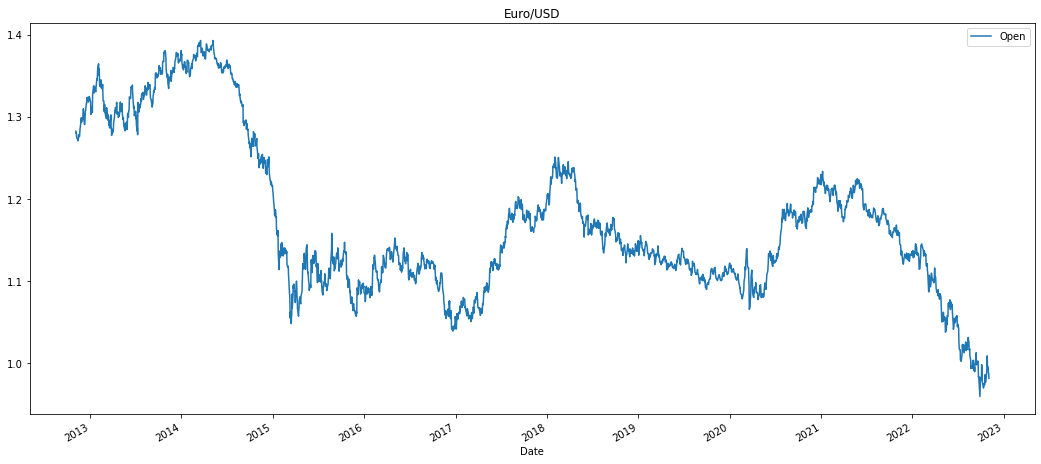

In [58]:
df.plot(figsize = (18, 8), title = "Euro/USD")

In [59]:
df.head()

Open
Date                
2012-11-05  1.282545
2012-11-06  1.280246
2012-11-07  1.280902
2012-11-08  1.275559
2012-11-09  1.274372

In [60]:
df["returns"] = np.log(df.div(df.shift(1)))


In [61]:
df

Open   returns
Date                          
2012-11-05  1.282545       NaN
2012-11-06  1.280246 -0.001794
2012-11-07  1.280902  0.000512
2012-11-08  1.275559 -0.004180
2012-11-09  1.274372 -0.000931
...              ...       ...
2022-10-28  0.996780 -0.012377
2022-10-31  0.995500 -0.001285
2022-11-01  0.988631 -0.006924
2022-11-02  0.987791 -0.000850
2022-11-03  0.981836 -0.006047

[2604 rows x 2 columns]

In [62]:
df.dropna(inplace = True)

In [63]:
df

Open   returns
Date                          
2012-11-06  1.280246 -0.001794
2012-11-07  1.280902  0.000512
2012-11-08  1.275559 -0.004180
2012-11-09  1.274372 -0.000931
2012-11-12  1.272426 -0.001528
...              ...       ...
2022-10-28  0.996780 -0.012377
2022-10-31  0.995500 -0.001285
2022-11-01  0.988631 -0.006924
2022-11-02  0.987791 -0.000850
2022-11-03  0.981836 -0.006047

[2603 rows x 2 columns]

# Hold strategy

<AxesSubplot:>

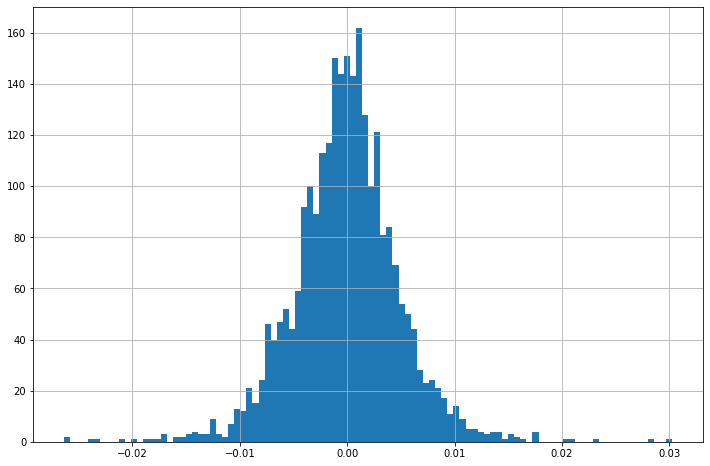

In [64]:
df.returns.hist(bins = 100, figsize = (12, 8))

In [65]:
df.returns.sum()

-0.2671769919760223

In [66]:
df.returns.cumsum()

Date
2012-11-06   -0.001794
2012-11-07   -0.001282
2012-11-08   -0.005462
2012-11-09   -0.006392
2012-11-12   -0.007920
                ...   
2022-10-28   -0.252071
2022-10-31   -0.253356
2022-11-01   -0.260280
2022-11-02   -0.261130
2022-11-03   -0.267177
Name: returns, Length: 2603, dtype: float64

In [67]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

In [68]:
df

Open   returns  creturns
Date                                    
2012-11-06  1.280246 -0.001794  0.998208
2012-11-07  1.280902  0.000512  0.998719
2012-11-08  1.275559 -0.004180  0.994553
2012-11-09  1.274372 -0.000931  0.993628
2012-11-12  1.272426 -0.001528  0.992111
...              ...       ...       ...
2022-10-28  0.996780 -0.012377  0.777190
2022-10-31  0.995500 -0.001285  0.776192
2022-11-01  0.988631 -0.006924  0.770835
2022-11-02  0.987791 -0.000850  0.770181
2022-11-03  0.981836 -0.006047  0.765538

[2603 rows x 3 columns]

<AxesSubplot:xlabel='Date'>

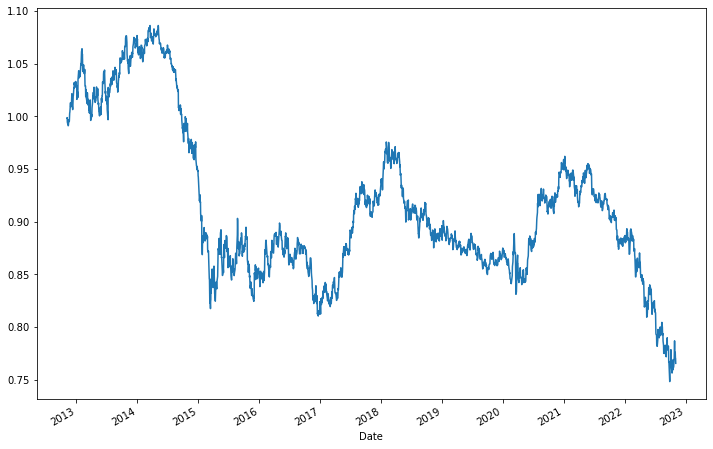

In [69]:
df.creturns.plot(figsize = (12, 8))

# Defining local max and min

In [70]:
def get_max_min(prices, smoothing, window_range):
    
    try:
        prices = prices["Close"]
        smooth_prices = prices['Close'].rolling(window=smoothing).mean().dropna()
    except KeyError:
        smooth_prices = prices.rolling(window=smoothing).mean().dropna()
    local_max = argrelextrema(smooth_prices.values, np.greater)[0]
    local_min = argrelextrema(smooth_prices.values, np.less)[0]
    price_local_max_dt = []
    for i in local_max:
        if (i>window_range) and (i<len(prices)-window_range):
            price_local_max_dt.append(prices.iloc[i-window_range:i+window_range].idxmax())
    price_local_min_dt = []
    for i in local_min:
        if (i>window_range) and (i<len(prices)-window_range):
            price_local_min_dt.append(prices.iloc[i-window_range:i+window_range].idxmin())  
    maxima = pd.DataFrame(prices.loc[price_local_max_dt])
    minima = pd.DataFrame(prices.loc[price_local_min_dt])
    max_min = pd.concat([maxima, minima]).sort_index()
    max_min.index.name = 'Date'
    max_min = max_min.reset_index()
    max_min = max_min[~max_min.Date.duplicated()]
    p = prices.reset_index()   
    max_min['day_num'] = p[p['Date'].isin(max_min.Date)].index.values
    try:
        max_min = max_min.set_index('day_num')['Close']
    except KeyError:
        max_min = max_min.set_index('day_num')

    
    return max_min


In [71]:
start = "2017-11-01"
end = "2018-9-30"

In [72]:
# prices = yf.download(tickers = "IVV", period = "5y")
prices = yf.download(tickers = "IVV", start = start, end = end)

[*********************100%***********************]  1 of 1 completed


In [73]:
prices

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-10-31  258.940002  259.190002  258.559998  258.809998  236.396301   
2017-11-01  259.790009  260.190002  258.820007  259.230011  236.779968   
2017-11-02  259.170013  259.489990  257.940002  259.369995  236.907806   
2017-11-03  259.540009  260.250000  259.059998  260.179993  237.647659   
2017-11-06  260.040009  260.769989  259.989990  260.619995  238.049561   
...                ...         ...         ...         ...         ...   
2018-09-24  294.790009  294.940002  293.799988  294.470001  272.729340   
2018-09-25  294.970001  295.070007  293.920013  294.160004  272.442230   
2018-09-26  293.040009  294.410004  291.579987  292.019989  271.639496   
2018-09-27  292.570007  294.070007  291.929993  292.820007  272.383698   
2018-09-28  292.149994  293.440002  292.100006  292.730011  272.299927   

             Volume  
Date                 
2017-10-31  3346600  
2017-11-01  2512300  
2017-11-02  3351500  
2017-11-03  2690300  
2017-11-06  2437000  
...             ...  
2018-09-24  3412700  
2018-09-25  3341900  
2018-09-26  4082400  
2018-09-27  2628200  
2018-09-28  5172100  

[230 rows x 6 columns]

In [74]:
smoothing = 1
window_range = 10


# END TEST OF FUNCTION

# Function works

# Defining Min and Max points and plotting

In [75]:
minmax = get_max_min(prices, smoothing, window_range)

In [76]:
print(len(minmax))

55


<AxesSubplot:>

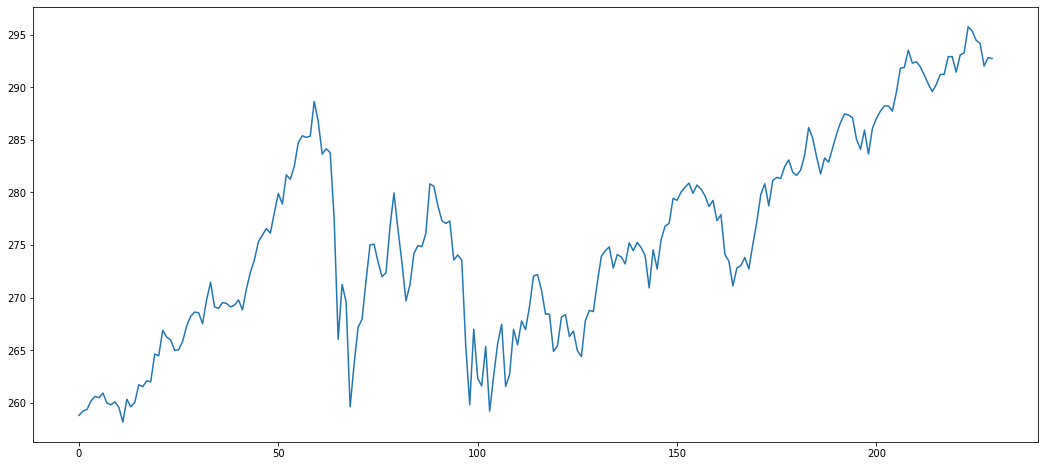

In [77]:
prices.reset_index()["Close"].plot(figsize = (18, 8))

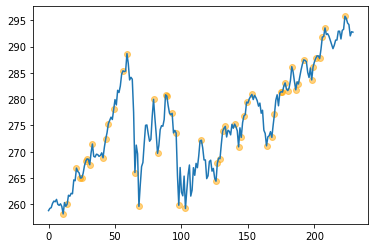

In [78]:
prices.reset_index()["Close"].plot()
plt.scatter(minmax.index, minmax.values, color = "orange", alpha = 0.5)

# Finding patterns

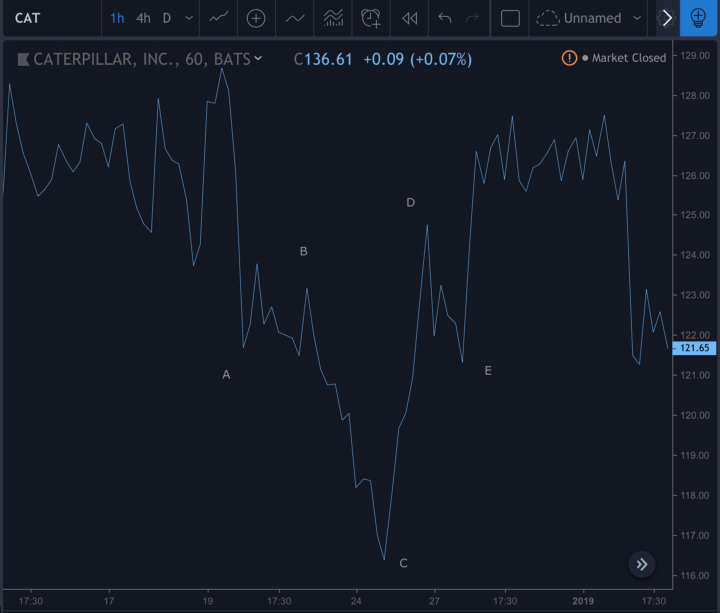

## To find patterns, we simply iterate over all our min max points, and find windows where the points meet some pattern criteria. For example, an inverse head and shoulders can roughly be defined as:

C < A, B, D, E

A, E < B, D

To filter for head and shoulders with even necklines:

abs(B-D) < np.mean([B, D])*0.05

(The difference between the necklines must not be more than 5%.)

# FUNCTION FOR INVERSE HEAD AND SHOULDERS

In [79]:
def find_patterns(max_min, stock_symbol = None):  
    patterns = defaultdict(list)
    
    # Window range is 5 units
    for i in range(5, len(max_min)):  
        window = max_min.iloc[i-5:i]
        if stock_symbol:
            window = window[stock_symbol]
        
        # Pattern must play out in less than n units
        if window.index[-1] - window.index[0] > 100:      
            continue   
        a, b, c, d, e = window.iloc[0:5]
                
        # IHS
        if a<b and c<a and c<e and c<d and e<d and abs(b-d)<=np.mean([b,d])*0.02:
               patterns['IHS'].append((window.index[0], window.index[-1]))
        
    return patterns

In [80]:
patterns = find_patterns(minmax)
patterns

defaultdict(list, {'IHS': [(28, 41)]})

# Reorganize and iterate to find best params

## In order to find the best params, I reorganized my code into functions and iterated through multiple stocks, smoothing, and window parameters.

In [81]:
def plot_minmax_patterns(prices, max_min, patterns, stock, window, ema):
    
    incr = str((prices.index[1] - prices.index[0]).seconds/60)
    
    if len(patterns) == 0:
        pass
    else:
        num_pat = len([x for x in patterns.items()][0][1])
        f, axes = plt.subplots(1, 2, figsize=(16, 5))
        axes = axes.flatten()
        try:
            prices_ = prices.reset_index()['Close']
        except KeyError:
            prices_ = prices.reset_index()[stock]
            max_min = max_min[stock]
        axes[0].plot(prices_)
        axes[0].scatter(max_min.index, max_min, s=100, alpha=.3, color='orange')
        axes[1].plot(prices_)
        for name, end_day_nums in patterns.items():
            for i, tup in enumerate(end_day_nums):
                sd = tup[0]
                ed = tup[1]
                axes[1].scatter(max_min.loc[sd:ed].index,
                              max_min.loc[sd:ed].values,
                              s=200, alpha=.3)
                plt.yticks([])
        plt.tight_layout()
        plt.title('{}: {}: EMA {}, Window {} ({} patterns)'.format(stock, incr, ema, window, num_pat))






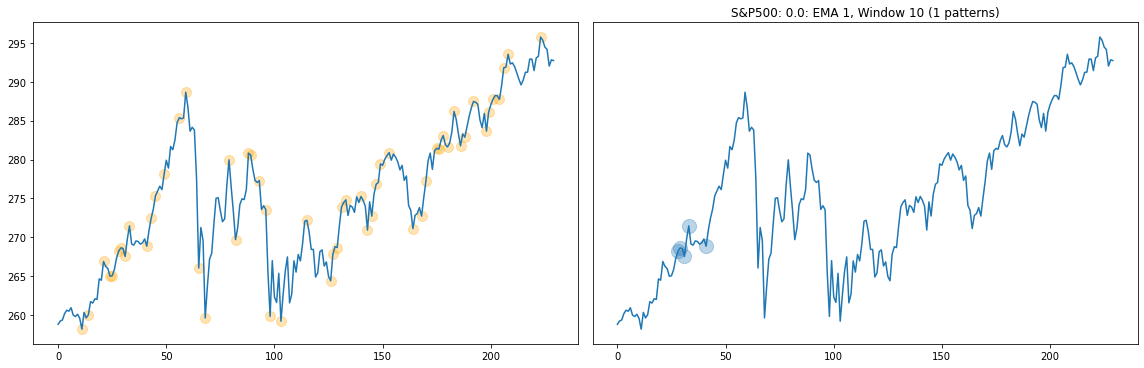

In [82]:
plot_minmax_patterns(prices, minmax, patterns, "S&P500", 10, 1)

In [83]:
def get_results(prices, max_min, pat, stock, ema_, window_):
    
    incr = str((prices.index[1] - prices.index[0]).seconds/60)
    
    #fw_list = [1, 12, 24, 36] 
    fw_list = [1, 2, 3]
    results = []
    if len(pat.items()) > 0:
        end_dates = [v for k, v in pat.items()][0]      
        for date in end_dates:  
            param_res = {'stock': stock,
                         'increment': incr,
                         'ema': ema_,
                         'window': window_, 
                         'date': date}
            for x in fw_list:
                prices = prices.reset_index()
                try:
                    returns = (prices[stock].pct_change(x).shift(-x).reset_index(drop=True).dropna())
                except KeyError:
                    returns = (prices['Close'].pct_change(x).shift(-x).reset_index(drop=True).dropna())
                try:
                    param_res['fw_ret_{}'.format(x)] = returns.loc[date[1]]   
                except Exception as e:
                    param_res['fw_ret_{}'.format(x)] = e
            results.append(param_res)  
    else:
        param_res = {'stock': stock,
                     'increment': incr,
                     'ema': ema_,
                     'window': window_,
                     'date': None}
        for x in fw_list:
            param_res['fw_ret_{}'.format(x)] = None   
        results.append(param_res)
    return pd.DataFrame(results)

In [84]:
def screener(stock_data, ema_list, window_list, plot, results):
    
    all_results = pd.DataFrame()
    stock_data = stock_data["Close"]
    
    for stock in stock_data:
        prices = stock_data[stock]
        
        for ema_ in ema_list:
            for window_ in window_list: 
                max_min = get_max_min(prices, smoothing=ema_, window_range=window_)
                pat = find_patterns(max_min, stock)
                
                if plot == True:
                    plot_minmax_patterns(prices, max_min, pat, stock, window_, ema_)
                    
                if results == True:
                    all_results = pd.concat([all_results, get_results(prices, max_min, pat, stock, ema_, window_)], axis=0)
                
    if results == True:
        return all_results.reset_index(drop=True)

In [85]:
stocklist = ["MSFT", "V", "AMZN", "GOOG", "NFLX", "AAPL"]

In [91]:
start = "2017-01-01"
end = "2019-12-30"

In [92]:
stock_data = yf.download(tickers = stocklist, start = start, end = end)

[*********************100%***********************]  6 of 6 completed


In [93]:
ema_list = [1]
window_list = [10, 15, 20]

ValueError: cannot insert level_0, already exists

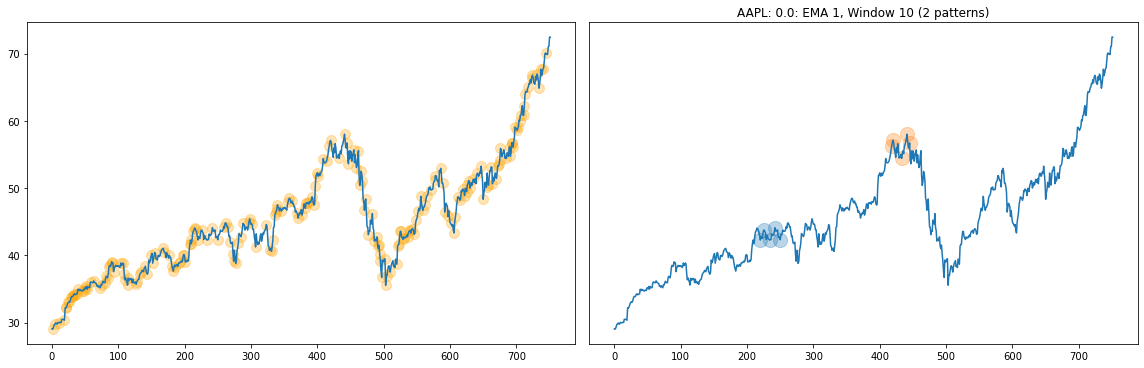

In [94]:
results = screener(stock_data, ema_list, window_list, plot = True, results = True)